BOLAR 15 "EXERCÍCIOS"




Usando a biblioteca faker para criar uma lista com dados aleatórios contendo as colunas: nome, valor da hora aula (entre 60 e 110), curso de graduação, número de alunos de cada professor e escolaridade do professor, random para gerar valores aleatórios dentro dos intervalos especificados e pandas para criar e manipular a tabela.

Para utilizar a biblioteca faker foi necessário instalar.

In [3]:
# 1) Será necessário instalar a biblioteca faker
!pip install faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:00


Para importar as bibliotecas que serão utilizadas é necessário os comandos abaixo:

In [27]:
import random
from faker import Faker
import pandas as pd
import matplotlib.pyplot as plt


Para inicializar uma instância da classe `Faker` do módulo `faker` e especificar que deseja gerar dados falsos em português brasileiro é nessessário o comando:

In [19]:
# 2) Inicializando o Faker
fake = Faker('pt_BR')

Para criar as listas dos cursos e escolaridade será necessário o comando abaixo:

In [20]:
# 3) Lista de cursos de graduação e escolaridade
cursos_graduacao = [
    "Engenharia", "Medicina", "Direito", "Administração",
    "Arquitetura", "Ciências de Dados", "Psicologia", "Educação Física"
]
escolaridade_professor = [
    "Graduação", "Pós-Graduação", "Mestrado", "Doutorado"
]

Utilizando fake para gerar dados falsos realistas e random para gerar numeros aleatórios.

In [29]:
# Função para gerar dados de professores
def gerar_dados_professores(n):
    dados_professores = []
    for _ in range(n):
        nome = fake.name()
        valor_hora_aula = round(random.uniform(60, 110), 2)
        curso_graduacao = random.choice(cursos_graduacao)
        numero_alunos = random.randint(5, 50)
        escolaridade = random.choice(escolaridade_professor)

        dados_professores.append({
            "Nome": nome,
            "Valor da Hora Aula": valor_hora_aula,
            "Curso de Graduação": curso_graduacao,
            "Número de Alunos": numero_alunos,
            "Escolaridade": escolaridade
        })

    return dados_professores

Criando a lista contendo 1000 conjuntos de dados dos professores.

In [66]:
# 5) Gerar uma lista com 100 dados de professores
dados_professores = gerar_dados_professores(1000)

Transformando os dados em um DataFrame.

In [67]:
# 6) Converter os dados para um DataFrame do pandas
df_professores = pd.DataFrame(dados_professores)

Visualizar os dados:

In [68]:
# 7) Imprimir a tabela
print(df_professores)

                   Nome  Valor da Hora Aula Curso de Graduação  \
0       Camila Monteiro               90.08         Psicologia   
1    Luiz Otávio Moraes              108.51    Educação Física   
2            Juan Silva               74.95         Engenharia   
3       Olívia da Cunha               92.20        Arquitetura   
4       Rafaela da Cruz               83.07        Arquitetura   
..                  ...                 ...                ...   
995           Léo Abreu               75.02      Administração   
996          Sofia Dias               92.26         Engenharia   
997     Sr. Diego Pires              103.81            Direito   
998        Rhavi Borges              100.36         Engenharia   
999         Bento Nunes               66.78            Direito   

     Número de Alunos   Escolaridade  
0                   8  Pós-Graduação  
1                  32  Pós-Graduação  
2                  40      Graduação  
3                  32      Doutorado  
4           

Criando o gráfico de barras vermelhas para verificar o numero de professores por curso utilizando os dados do Dataframe.

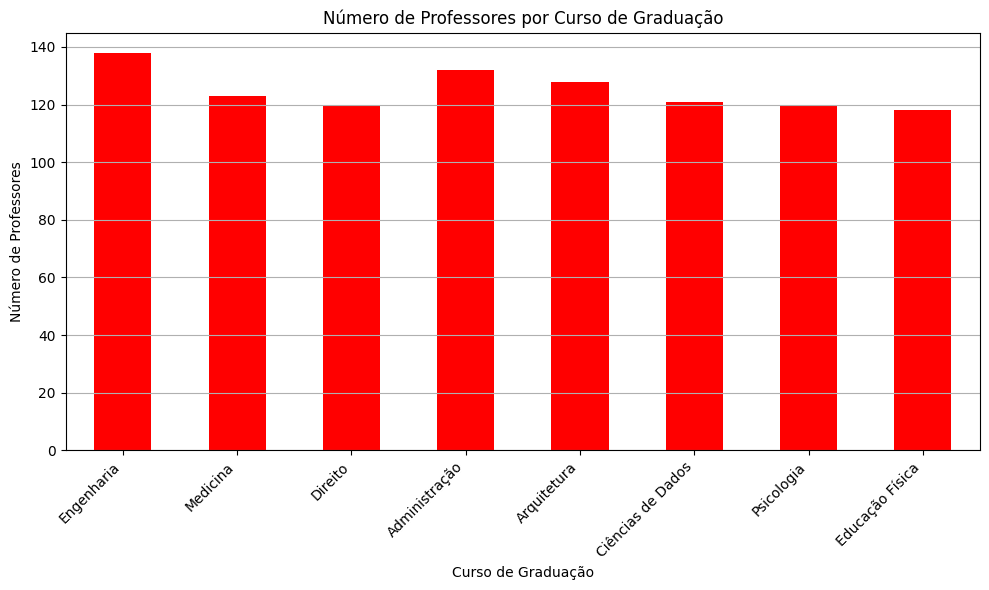

In [70]:
# 8) Gráfico de barras do número de professores por curso de graduação
plt.figure(figsize=(10, 6))
df_professores['Curso de Graduação'].value_counts().reindex(cursos_graduacao).plot(kind='bar', color='red')
plt.title('Número de Professores por Curso de Graduação')
plt.xlabel('Curso de Graduação')
plt.ylabel('Número de Professores')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [71]:
# 9) Calcular a média do valor da hora aula por curso de graduação
media_valor_hora_por_curso = df_professores.groupby('Curso de Graduação')['Valor da Hora Aula'].mean()

In [72]:
# 10) # Ordenar os valores pela média do valor da hora aula
media_valor_hora_por_curso = media_valor_hora_por_curso.sort_values()

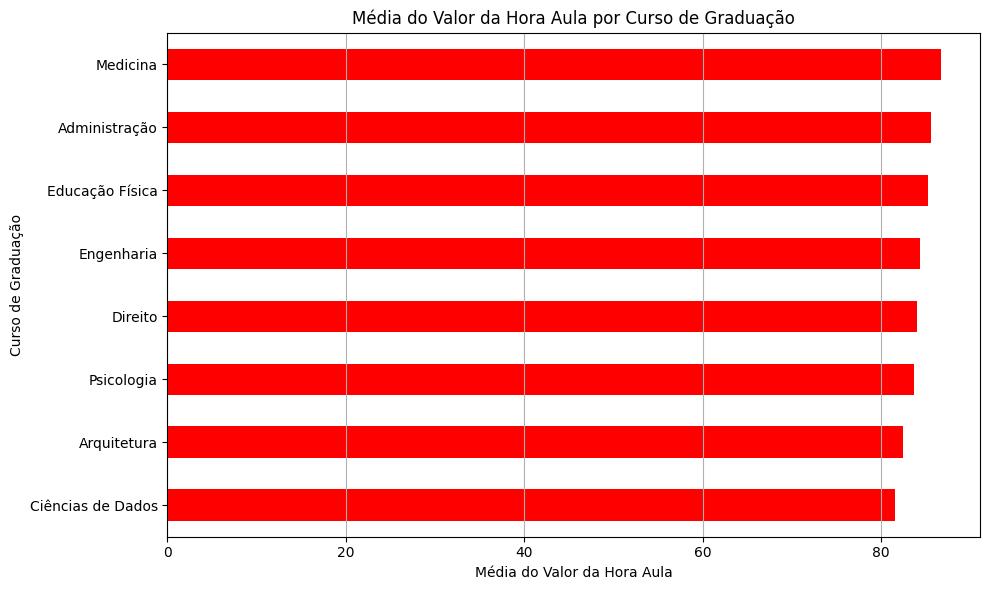

In [73]:
#  11) Criar o gráfico de barras
plt.figure(figsize=(10, 6))
media_valor_hora_por_curso.plot(kind='barh', color='red')
plt.title('Média do Valor da Hora Aula por Curso de Graduação')
plt.xlabel('Média do Valor da Hora Aula')
plt.ylabel('Curso de Graduação')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Entender se existe correlação entre a escolaridade e o valor da hora aula.

In [74]:
# 12) Calcular o número total de alunos por curso de graduação
num_alunos_por_curso = df_professores.groupby('Curso de Graduação')['Número de Alunos'].sum()

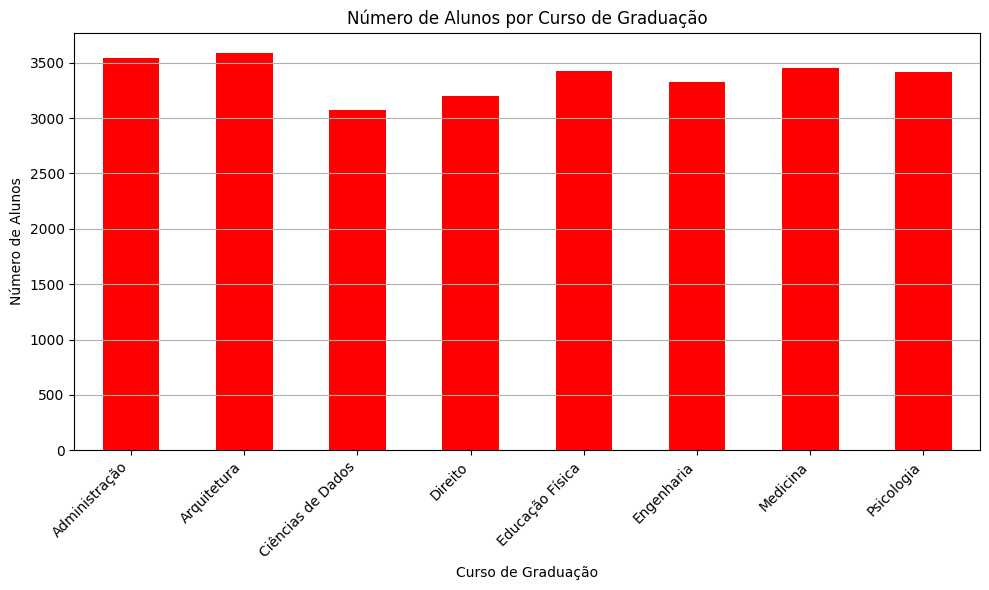

In [75]:
# 13) Criar o gráfico de barras
plt.figure(figsize=(10, 6))
num_alunos_por_curso.plot(kind='bar', color='red')
plt.title('Número de Alunos por Curso de Graduação')
plt.xlabel('Curso de Graduação')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [76]:
# 14) Contar o número de professores por escolaridade
professores_por_escolaridade = df_professores.groupby('Escolaridade').size()

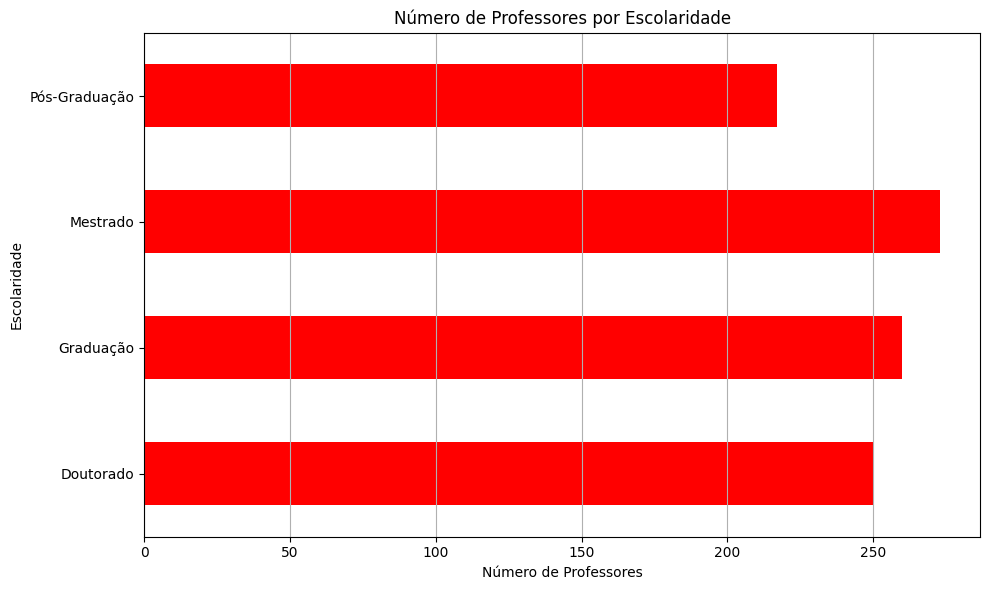

In [77]:
# 15) Criar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
professores_por_escolaridade.plot(kind='barh', stacked=True, color='red')
plt.title('Número de Professores por Escolaridade')
plt.xlabel('Número de Professores')
plt.ylabel('Escolaridade')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Fim